# Initialization
* We will see how different initializations lead to different results
* A well chosen initialization can speed up the convergence of gradient descent

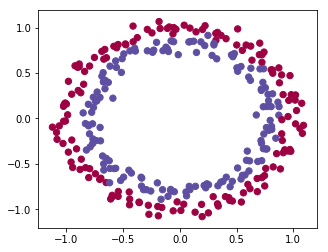

In [1]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from init_utils import *

%matplotlib inline
plt.rcParams['figure.figsize']=(5, 4)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Load image dataset
train_X, train_Y, test_X, test_Y = load_dataset()

# 1 - Neural Netwrok model
We will use 3 initialization methods in pre-defined 3-layer neural 
* Zeros Initialization -- weights are initialized 0
* Random Initialization -- weights are initialized to large random values
* He Initialization -- according to He et al., 2015

In [2]:
def model(X, Y, learning_rate=.01, num_iterations=15000, print_every=100, initialization='he'):
    """
    Implement 3-layer neural network: LINEAR -> ReLU -> LINEAR -> ReLU -> LINEAR -> Sigmoid
    Arguments:
    X -- the input (input features size, # of points) - (2, # of points)
    Y -- the output (output features size, # of points) - 1 for red and 0 for blue dots
    print_every -- number of iterations cost will be printed
    initialization -- three methods: 'zeros', 'he' and 'random'
    Returns:
    paramaters -- all parameters learnt in gradient descent loop
    """
    grads = {} # dictionary each element contains gradients wrt to parameters
    costs = [] # to plot the costs
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, Y.shape[0]]
    
    # Initializes the parameters
    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)
        
    # Loops
    for it in range(num_iterations):
        #Forward propagation
        A3, cache = forward_propagation(X, parameters)
        
        # Cost
        cost = compute_loss(A3, Y)
        
        #Backward propagation
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_every != None and (it+1)%print_every==0:
            print('Cost after', it+1, 'is', cost)
            costs.append(cost)
            
    plt.plot(costs)
    plt.xlabel('Iterations (per hundred)')
    plt.ylabel('Cost')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()
    
    return parameters

# 2 - Zero Initialization

In [3]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layers_dims -- list contains size of each layer
    Returns:
    Weight and bias of each layer
    """
    parameters = {}
    L = len(layers_dims) # number of layers
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

In [4]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Running zeros initialization with iterations = 15000

Cost after 1000 is 0.6931471805599453
Cost after 2000 is 0.6931471805599453
Cost after 3000 is 0.6931471805599453
Cost after 4000 is 0.6931471805599453
Cost after 5000 is 0.6931471805599453
Cost after 6000 is 0.6931471805599453
Cost after 7000 is 0.6931471805599453
Cost after 8000 is 0.6931471805599453
Cost after 9000 is 0.6931471805599453
Cost after 10000 is 0.6931471805599453
Cost after 11000 is 0.6931471805599453
Cost after 12000 is 0.6931471805599453
Cost after 13000 is 0.6931471805599453
Cost after 14000 is 0.6931471805599453
Cost after 15000 is 0.6931471805599453


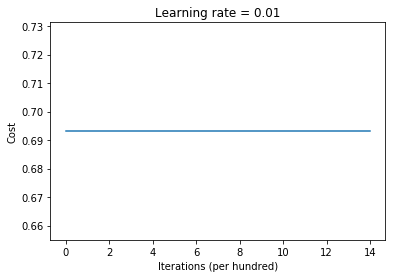

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [5]:
parameters = model(train_X, train_Y, print_every=1000, initialization='zeros')
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing. Why? Lets look at the details of the predictions and the decision boundary:

In [27]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


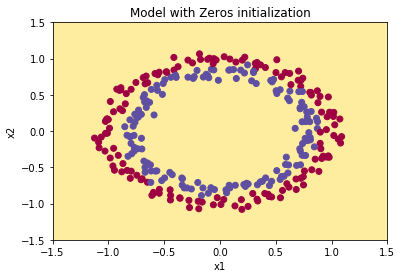

In [6]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

The model is predicting 0 for every example. 

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression. 

<font color='blue'>
**What you should remember**:
- The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
- It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 


# 3 - Random Initialization
To break symmetry, lets intialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs

Following function to initialize your weights to large random values (scaled by *10) and your biases to zeros

In [15]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layers_dims -- list contains size of each layer
    Returns:
    Weight and bias of each layer
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [16]:
parameters = initialize_parameters_random([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Running random initialization with iterations = 15000

D:\Work\Data-Science\Coursera\Improving_Deep_Neural_networks\Week01\Initialization\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\Work\Data-Science\Coursera\Improving_Deep_Neural_networks\Week01\Initialization\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after 1000 is 0.6262293795702297
Cost after 2000 is 0.5983994187921166
Cost after 3000 is 0.5640981680876506
Cost after 4000 is 0.5502292999561219
Cost after 5000 is 0.5445272260972054
Cost after 6000 is 0.537500133484104
Cost after 7000 is 0.4797680758047141
Cost after 8000 is 0.39788417742563725
Cost after 9000 is 0.3934953262029758
Cost after 10000 is 0.3920390877650994
Cost after 11000 is 0.3893195629555345
Cost after 12000 is 0.3861588202099316
Cost after 13000 is 0.38499702813144443
Cost after 14000 is 0.3828137684821277
Cost after 15000 is 0.38107906105980793


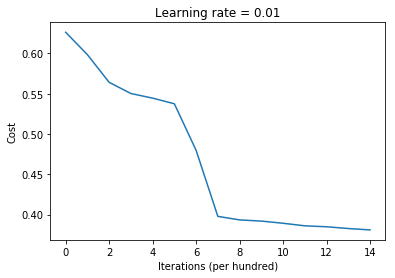

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [17]:
parameters = model(train_X, train_Y, print_every=1000, initialization='random')
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Anyway, it looks like you have broken symmetry, and this gives better results than before. The model is no longer outputting all 0s.

In [18]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

predictions_train = [[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
predictions_test = [[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


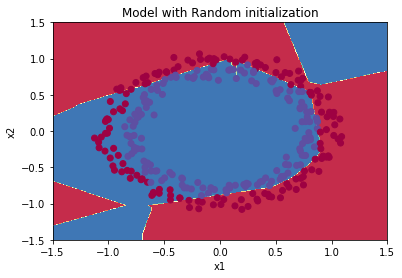

In [19]:
plt.title("Model with Random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.

<font color='blue'>
**In summary**:
- Initializing weights to very large random values does not work well. 
- Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part! 

## 4 - He initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [21]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layers_dims -- list contains size of each layer
    Returns:
    Weight and bias of each layer
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [22]:
parameters = initialize_parameters_he([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.46040903  0.3564088   0.07878985]
 [-1.52153542 -0.22648652 -0.28965949]]
b1 = [[0.]
 [0.]]
W2 = [[-0.08274148 -0.62700068]]
b2 = [[0.]]


Running he initialization with iterations = 15000

Cost after 1000 is 0.6879957873003248
Cost after 2000 is 0.6751428501394023
Cost after 3000 is 0.6526450756269871
Cost after 4000 is 0.608353829474852
Cost after 5000 is 0.5305947389663147
Cost after 6000 is 0.4139789560046996
Cost after 7000 is 0.3118675723488414
Cost after 8000 is 0.23702298132234245
Cost after 9000 is 0.18601794697587093
Cost after 10000 is 0.15018495099765508
Cost after 11000 is 0.12327705069456917
Cost after 12000 is 0.09919596010837306
Cost after 13000 is 0.08458298196934862
Cost after 14000 is 0.07359032213950309
Cost after 15000 is 0.0648186846657912


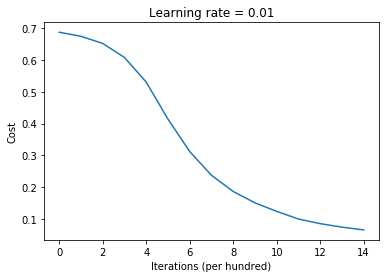

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [23]:
parameters = model(train_X, train_Y, print_every=1000, initialization='he')
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

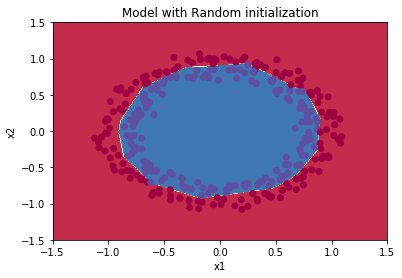

In [24]:
plt.title("Model with Random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The model with He initialization separates the blue and the red dots very well in a small number of iterations.

You have seen three different types of initializations. For the same number of iterations and same hyperparameters the comparison is:

<table> 
    <tr>
        <td>
        **Model**
        </td>
        <td>
        **Train accuracy**
        </td>
        <td>
        **Problem/Comment**
        </td>

    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

**What you should remember from this notebook**:
- Different initializations lead to different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Don't intialize to values that are too large
- **He initialization works well for networks with ReLU activations. **